In [1]:
import numpy as np
import torch

import json

import matplotlib.pyplot as plt

import deblending_runjingdev.simulated_datasets_lib as simulated_datasets_lib
import deblending_runjingdev.sdss_dataset_lib as sdss_dataset_lib
import deblending_runjingdev.starnet_lib as starnet_lib
import deblending_runjingdev.sleep_lib as sleep_lib
import deblending_runjingdev.image_statistics_lib as image_statistics_lib
import deblending_runjingdev.daophot_catalog_lib as daophot_catalog_lib

import deblending_runjingdev.plotting_utils as plotting_utils

from deblending_runjingdev.which_device import device

np.random.seed(34534)

In [2]:
sdss_image, sdss_background, hubble_locs, hubble_fluxes, sdss_data, wcs = \
    sdss_dataset_lib.load_m2_data(x0 = 720, x1 = 20, slen=400)

loading sdss image from ../../sdss_stage_dir/2583/2/136/frame-r-002583-2-0136.fits
loading sdss image from ../../sdss_stage_dir/2583/2/136/frame-i-002583-2-0136.fits
loading hubble data from  ../hubble_data/hlsp_acsggct_hst_acs-wfc_ngc7089_r.rdviq.cal.adj.zpt
getting sdss coordinates from:  ../../sdss_stage_dir/2583/2/136/frame-r-002583-2-0136.fits

 aligning images. 
 Getting sdss coordinates from:  ../../sdss_stage_dir/2583/2/136/frame-i-002583-2-0136.fits


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]



 returning image at x0 = 720, x1 = 20


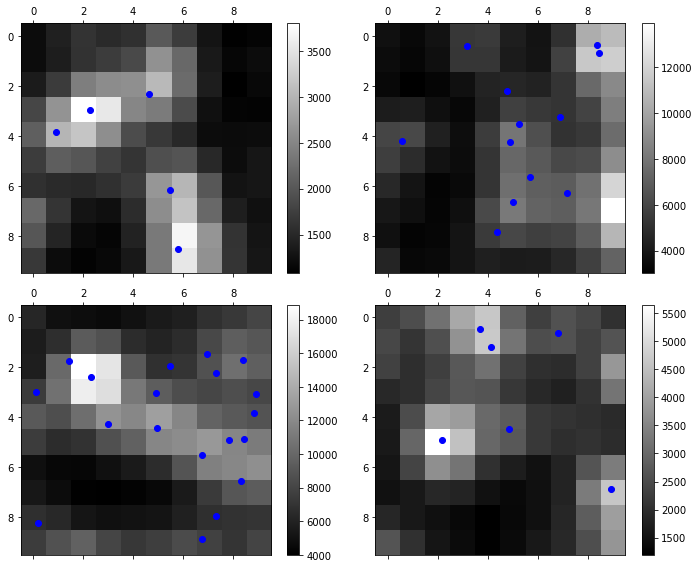

In [3]:
fig, axarr = plt.subplots(2, 2, figsize = (10, 8))

x0_vec = [26, 100, 150, 300]
x1_vec = [25, 300, 100, 350]

for i in range(4): 
    plotting_utils.plot_subimage(axarr[i // 2, i % 2], sdss_image[0], 
                                 None,  
                                 hubble_locs[hubble_fluxes[:, 0] > 5000], 
                                 x0 = x0_vec[i], 
                                 x1 = x1_vec[i], 
                                 patch_slen = 10, 
                                add_colorbar = True, 
                                global_fig = fig)

fig.tight_layout()

plt.savefig('../../figures/m2_example_subpatches.png')

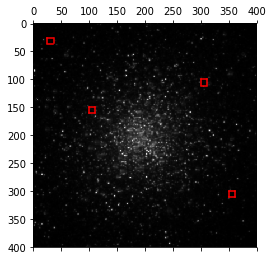

In [4]:
plt.matshow(sdss_image[0].cpu(), cmap = plt.cm.gray)
k = sdss_image.shape[-1] - 1
for i in range(4): 
    plt.axhline(x0_vec[i], xmin= (x1_vec[i]) / k, xmax= (x1_vec[i] + 10) / k, color = 'red')
    plt.axhline(x0_vec[i] + 11, xmin= (x1_vec[i]) / k, xmax= (x1_vec[i] + 10) / k, color = 'red')

    plt.axvline(x1_vec[i], ymin = 1 - (x0_vec[i] + 10) / k, ymax = 1 - x0_vec[i] / k, color = 'red')
    plt.axvline(x1_vec[i] + 11, ymin = 1 - (x0_vec[i] + 10) / k, ymax = 1 - x0_vec[i] / k, color = 'red')

plt.savefig('../../figures/m2_example_subpatches_full.png')

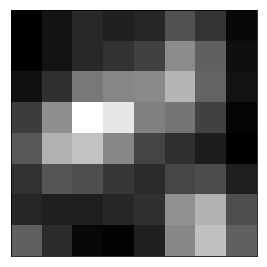

In [9]:
fig, axarr = plt.subplots(1, 1, figsize = (5, 4))

plotting_utils.plot_subimage(axarr, sdss_image[0], 
                                 None,  
                                 None, # hubble_locs[hubble_fluxes[:, 0] > 5000], 
                                 x0 = 26,
                                 x1 = 25, 
                                 patch_slen = 8, 
                                add_colorbar = False, 
                                global_fig = fig);

fig.tight_layout()

axarr.set_xticks([])
axarr.set_yticks([])

plt.savefig('../../figures/example_uncertainty.png')

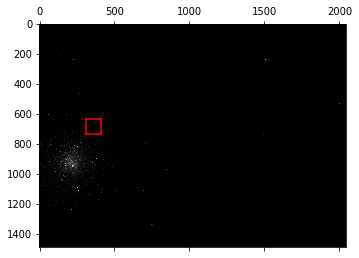

In [36]:
plt.matshow(sdss_data[0]['image'][0], 
            cmap = plt.cm.gray)

l1 = sdss_data[0]['image'].shape[-1]
plt.axhline(630, xmin= 310 / l1, xmax = 410 / l1, color = 'red')
plt.axhline(730, xmin= 310 / l1, xmax = 410 / l1, color = 'red')

l2 = sdss_data[0]['image'].shape[-2]
plt.axvline(310, ymin= (l2 - 730) / l2, ymax = (l2 - 630) / l2, color = 'red')
plt.axvline(410, ymin= (l2 - 730) / l2, ymax = (l2 - 630) / l2, color = 'red')

plt.savefig('../../figures/pcat_m2_location.png')